In [25]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":12})
matplotlib.rcParams.update({"font.family":"serif"})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [32]:
MODEL = "0110"

#MODEL = "0144"

#MODEL = "coronary"

CASE     = "sim_wom_rcr"
#CASE = "sim_cor_inflow"

#PATH = "aorta"  
#PATH = "right_iliac"

PATH = "aorta"
#PATH = "celiac_hepatic"
#PATH = "celiac_splenic"
#PATH = "ext_iliac_left"
#PATH = "renal_left"
#PATH = "renal_right"
#PATH = "SMA"

#PATH = "lc1"
#PATH = "lc1_sub1"
#PATH = "lc1_sub2"
#PATH = "lc1_sub3"
#PATH = "lc2"
#PATH = "lc2_sub1"

gen = 2
mesh       = 'coarse'

OUTPUT = os.path.join("/media/marsdenlab/Data1/UQ/"+MODEL,CASE,
                       str(gen),PATH)

io.mkdir(OUTPUT)

quants = [
 "pressure_0",
 "vWSS_3_boundary",
 "velocity_3"   
]

labels = [
  r"pressure $(mmHg)$",
  r"TAWSS magnitude $(dyne/cm^2)$",  
  r"Velocity magnitude $(cm/s)$"
]

BOOT_ROUNDS = 100

models   = list(range(500))
dt       = 0.004

DIR = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+CASE+"/csv/"+str(gen)+"_edit.csv"
    
df = pd.read_csv(DIR)

df_group = df.groupby(["path","model","time"]).mean()\
.groupby(["model","path"]).mean()\
.groupby('model').mean()

models = list(df['model'].unique())
x      = list(df['time'].unique())

print(df_group.shape)

Nx = 1
Nm = len(models)

print(df.columns)
print(Nm,' models')
print(Nx,' points')

(118, 33)
Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'area', 'generation',
       'length', 'mesh', 'model', 'nx', 'ny', 'nz', 'path', 'point',
       'pressure_0', 'pressure_0_boundary', 'radius_actual', 'radius_supplied',
       'time', 'vWSS_0', 'vWSS_0_boundary', 'vWSS_1', 'vWSS_1_boundary',
       'vWSS_2', 'vWSS_2_boundary', 'vWSS_3', 'vWSS_3_boundary', 'velocity_0',
       'velocity_0_boundary', 'velocity_1', 'velocity_1_boundary',
       'velocity_2', 'velocity_2_boundary', 'velocity_3',
       'velocity_3_boundary', 'x', 'y', 'z'],
      dtype='object')
118  models
1  points


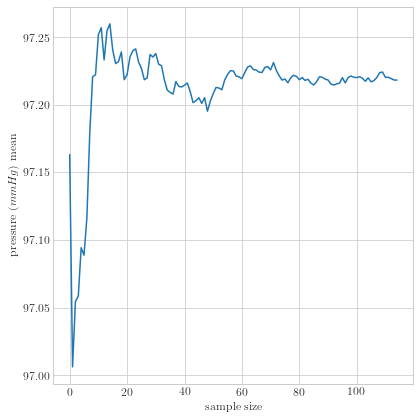

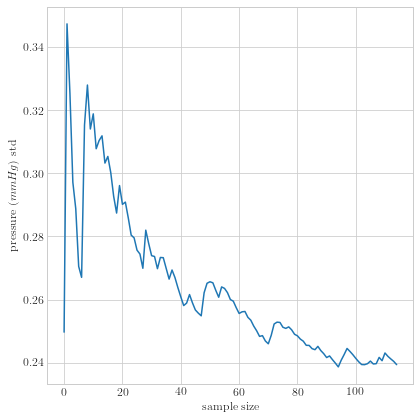

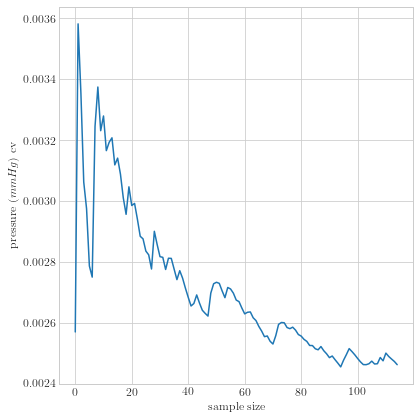

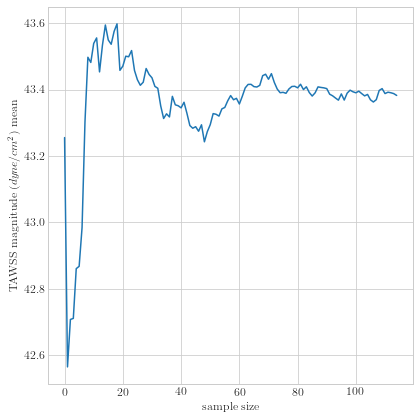

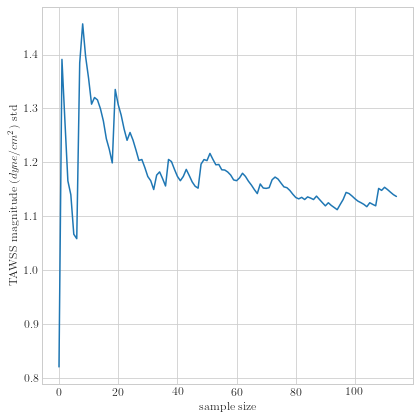

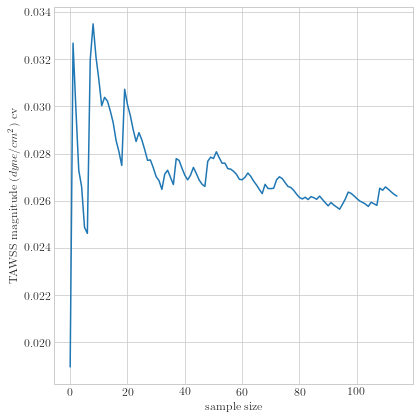

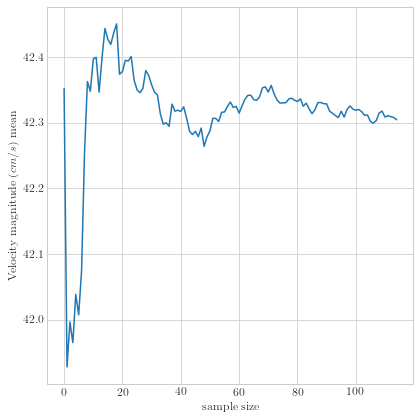

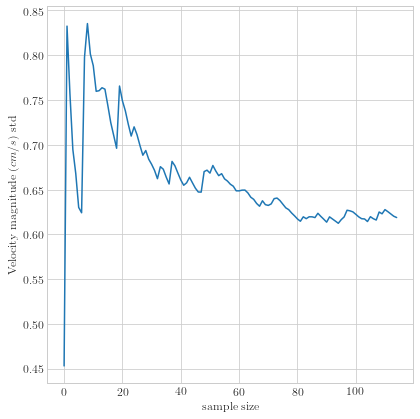

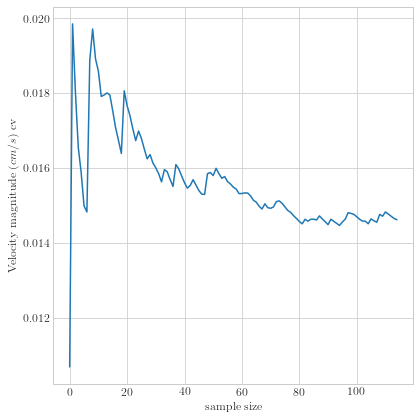

In [33]:
for quant,label in zip(quants,labels):

    Y  = np.zeros((Nm,Nx))
    for i,mo in enumerate(models):
        y    = df_group[quant].values[i]
        Y[i] = y

    mu_t  = np.mean(Y)
    std_t = np.std(Y)
    rel_std_t = std_t/mu_t

        
    MAT = np.zeros((Nm-3,3))
    for k in range(3,Nm):
        
        mu  = np.mean(Y[:k])
        std = np.std(Y[:k])
        rel_std = std/mu

        #MAT[k-3,0] = np.abs(mu-mu_t)/mu_t
        #MAT[k-3,1] = np.abs(std-std_t)/std_t
        #MAT[k-3,2] = np.abs(rel_std-rel_std_t)/rel_std_t
        
        MAT[k-3,0] = mu
        MAT[k-3,1] = std
        MAT[k-3,2] = rel_std
        
        
    plt.figure(figsize=(6,6))
    #plt.title('generation ' + str(generation))
    plt.plot(MAT[:,0])
    plt.ylabel(label + ' mean')
    plt.xlabel('sample size')
    plt.tight_layout()
    plt.savefig(OUTPUT+'/converge_mean_simple_{}.pdf'.format(quant),dpi=300)
    plt.show()
    plt.close()

    plt.figure(figsize=(6,6))
    #plt.title('generation ' + str(generation))
    plt.plot(MAT[:,1])
    plt.ylabel(label + ' std')
    plt.xlabel('sample size')
    plt.tight_layout()
    plt.savefig(OUTPUT+'/converge_std_simple_{}.pdf'.format(quant),dpi=300)
    plt.show()
    plt.close()

    plt.figure(figsize=(6,6))
    #plt.title('generation ' + str(generation))
    plt.plot(MAT[:,2])
    plt.ylabel(label + ' cv')
    plt.xlabel('sample size')
    plt.tight_layout()
    plt.savefig(OUTPUT+'/converge_cv_simple_{}.pdf'.format(quant),dpi=300)
    plt.show()
    plt.close()


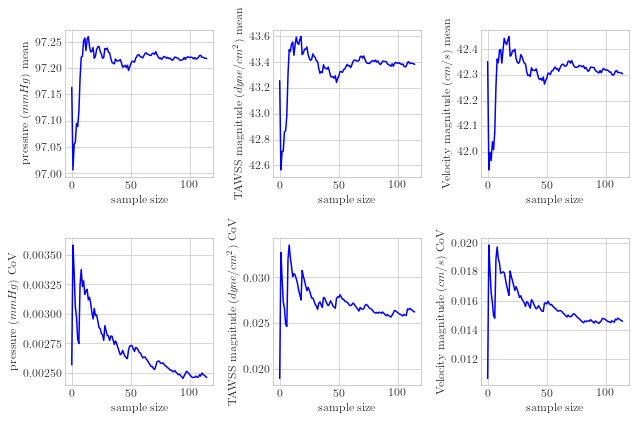

In [34]:
Size  = 3
count = 0
Wplot = len(labels)
f, axarr = plt.subplots(2, 3, figsize=(3*Size,2*Size))

count = 0
for i,quant in enumerate(quants):

    label = labels[i]
    
    Y  = np.zeros((Nm,Nx))
    for j,mo in enumerate(models):
        y    = df_group[quant].values[j]
        Y[j] = y

#     means = np.mean(Y,axis=1)
#     mu_t  = np.mean(means)
#     std_t = np.std(means)
#     rel_std_t = std_t/mu_t

        
    MAT = np.zeros((Nm-3,3))
    for k in range(3,Nm):
    
        means = np.mean(Y[:k],axis=1)
        mu  = np.mean(means)
        std = np.std(means)
        rel_std = std/mu

        MAT[k-3,0] = mu
        MAT[k-3,1] = std
        MAT[k-3,2] = rel_std
        
        
    axarr[0,i].plot(MAT[:,0], color='b')
    axarr[0,i].set_xlabel("sample size")
    axarr[0,i].set_ylabel('{} mean'.format(label))
    
#     axarr[1,i].plot(MAT[:,1], color='b')
#     axarr[1,i].set_xlabel("sample size")
#     axarr[1,i].set_ylabel(label + ' std')
    
    axarr[1,i].plot(MAT[:,2], color='b')
    axarr[1,i].set_xlabel("sample size")
    axarr[1,i].set_ylabel('{} CoV'.format(label))
    
plt.tight_layout()
plt.savefig(OUTPUT+'/convergence_combined.png',dpi=300)
plt.savefig(OUTPUT+'/convergence_combined.pdf',dpi=200)

plt.show()
plt.close()